In [1]:
import pandas as pd
import io
from google.colab import files

!rm Indian_Airlines.csv

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Indian_Airlines.csv']))

rm: cannot remove 'Indian_Airlines.csv': No such file or directory


Saving Indian_Airlines.csv to Indian_Airlines.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy

In [3]:
df.head()

,S.no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,1.0,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,2.0,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,3.0,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,4.0,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0


In [4]:
df.tail()

,S.no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148.0,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265.0
300149,300149.0,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105.0
300150,300150.0,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099.0
300151,300151.0,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585.0
300152,300152.0,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585.0


In [5]:
df.describe()

,S.no,duration,days_left,price
count,300152.000000,300153.000000,300153.000000,299189.000000
mean,150045.468772,12.221021,26.004751,20937.385863
std,86664.313719,7.191997,13.561004,22718.285635
min,0.000000,0.830000,1.000000,5.000000
25%,74995.750000,6.830000,15.000000,4780.000000
50%,150041.500000,11.250000,26.000000,7446.000000
75%,225096.250000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   S.no              300152 non-null  float64
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             299189 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 27.5+ MB


In [7]:
df.nunique()

S.no                300093
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12156
dtype: int64

In [8]:
for col in df:
    if df[col].dtype == 'object':
        print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


In [9]:
df['S.no'].isnull().values.any()

True

In [10]:
df.isnull().sum()

S.no                  1
airline               0
flight                0
source_city           0
departure_time        0
stops                 0
arrival_time          0
destination_city      0
class                 0
duration              0
days_left             0
price               964
dtype: int64

In [11]:
price_mean = df['price'].mean()

df['price'].fillna(price_mean, inplace=True)

In [12]:
df['S.no'].fillna(0, inplace=True)

In [13]:
df.isnull().sum()

S.no                0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

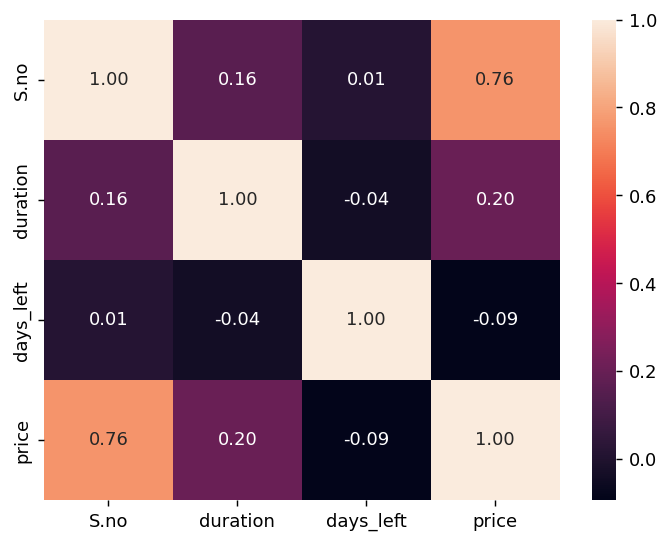

In [15]:
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

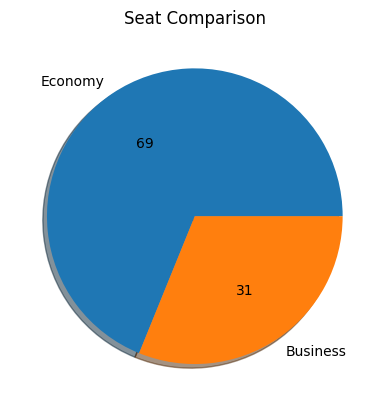

In [16]:
plt.pie(df['class'].value_counts(), labels=['Economy', 'Business'], autopct='%.f', shadow=True)
plt.title('Seat Comparison')
plt.show()

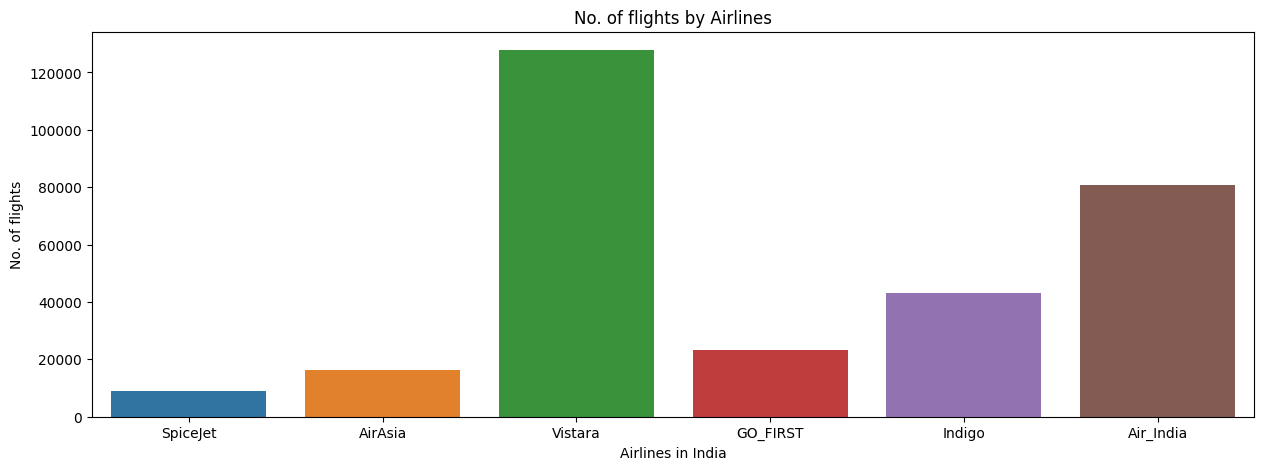

In [30]:
plt.figure(figsize=(15,5))
NF = sns.countplot(x='airline', data = df)
NF.set(xlabel='Airlines in India', ylabel='No. of flights', title='No. of flights by Airlines')
plt.show(NF)

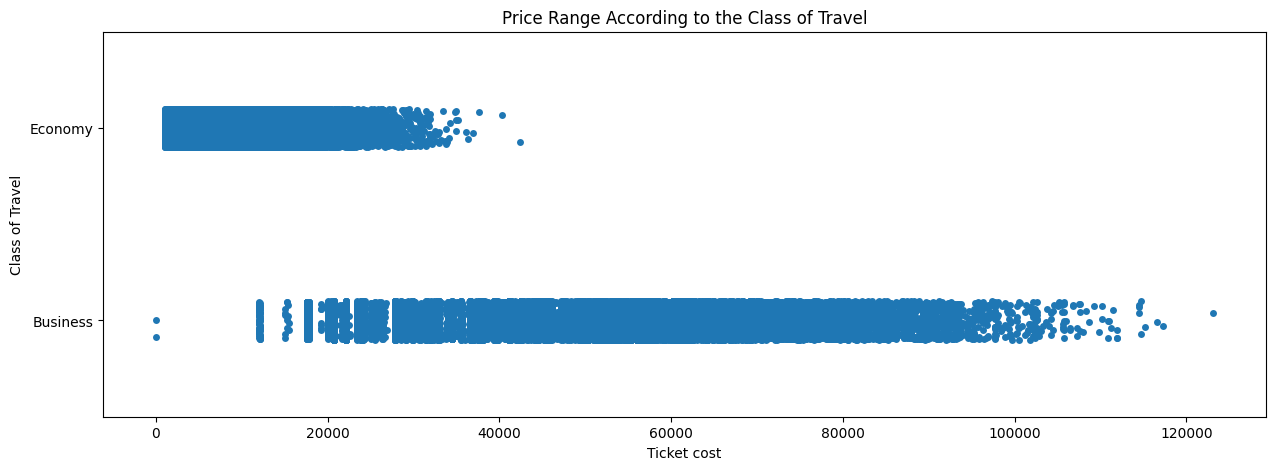

In [26]:
plt.figure(figsize=(15,5))
CE = sns.stripplot(x='price', y='class', data = df)
CE.set(xlabel='Ticket cost', ylabel='Class of Travel', title='Price Range According to the Class of Travel')
plt.show(CE)

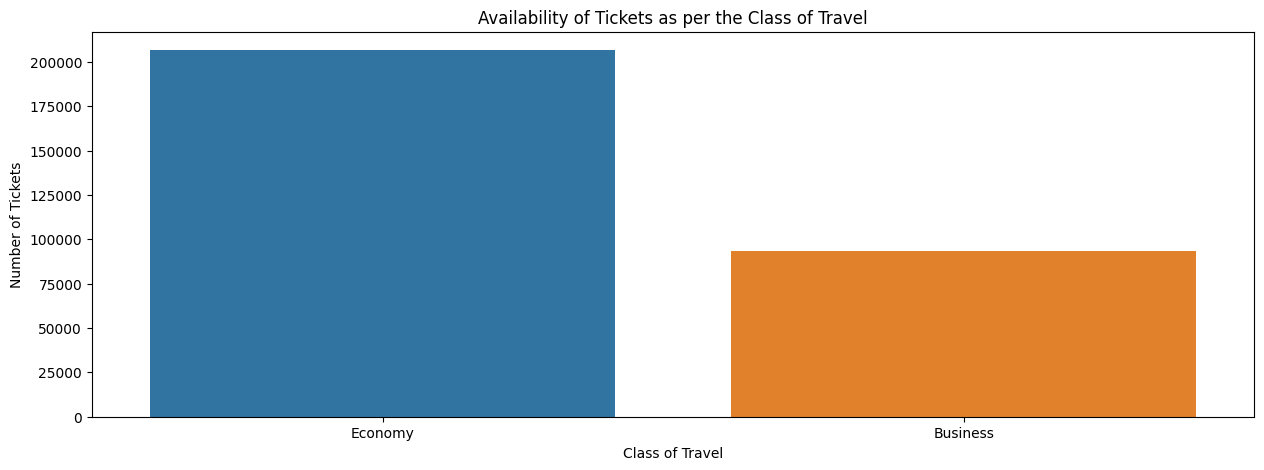

In [33]:
plt.figure(figsize=(15,5))
TA = sns.countplot(x='class', data = df)
TA.set(xlabel='Class of Travel', ylabel='Number of Tickets' , title='Availability of Tickets as per the Class of Travel')
plt.show(TA)

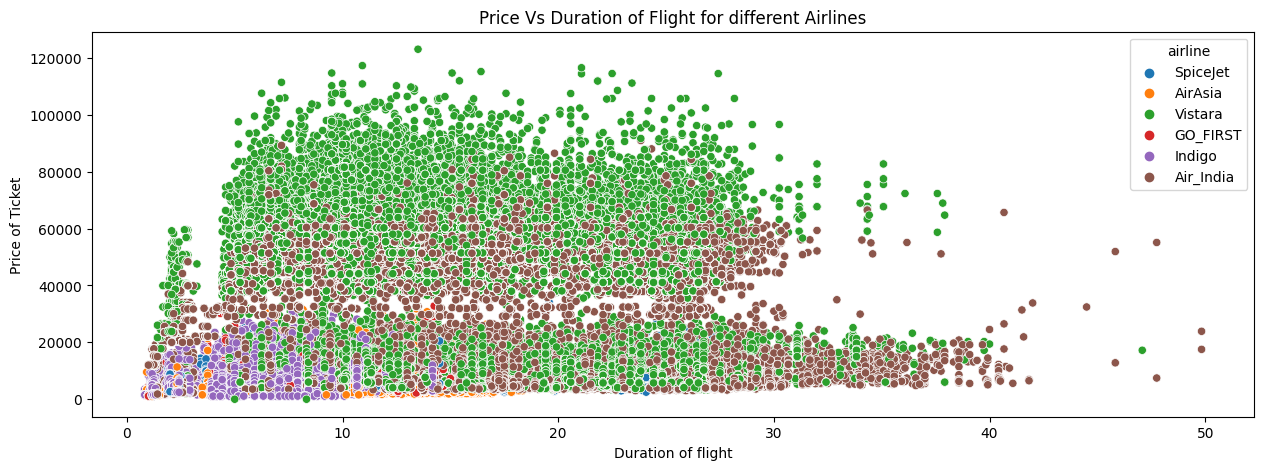

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
PD = sns.scatterplot(data=df, x='duration', y='price', hue='airline')
PD.set(xlabel='Duration of flight', ylabel='Price of Ticket', title='Price Vs Duration of Flight for different Airlines')
plt.show()

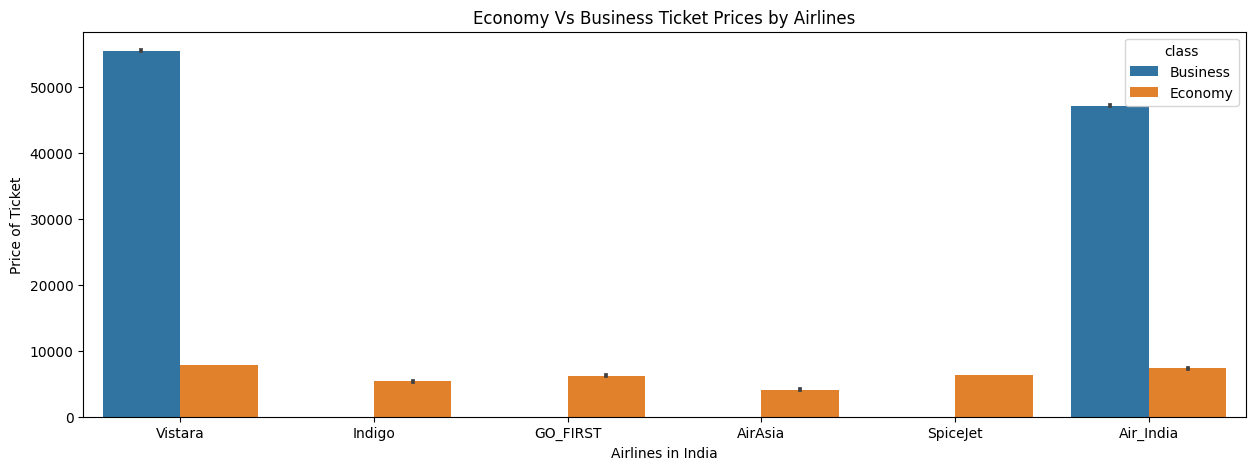

In [20]:
plt.figure(figsize=(15,5))
AS = sns.barplot(x='airline', y='price', hue='class', data = df.sort_values('price'))
AS.set(xlabel='Airlines in India', ylabel='Price of Ticket', title='Economy Vs Business Ticket Prices by Airlines')
plt.show(AS)

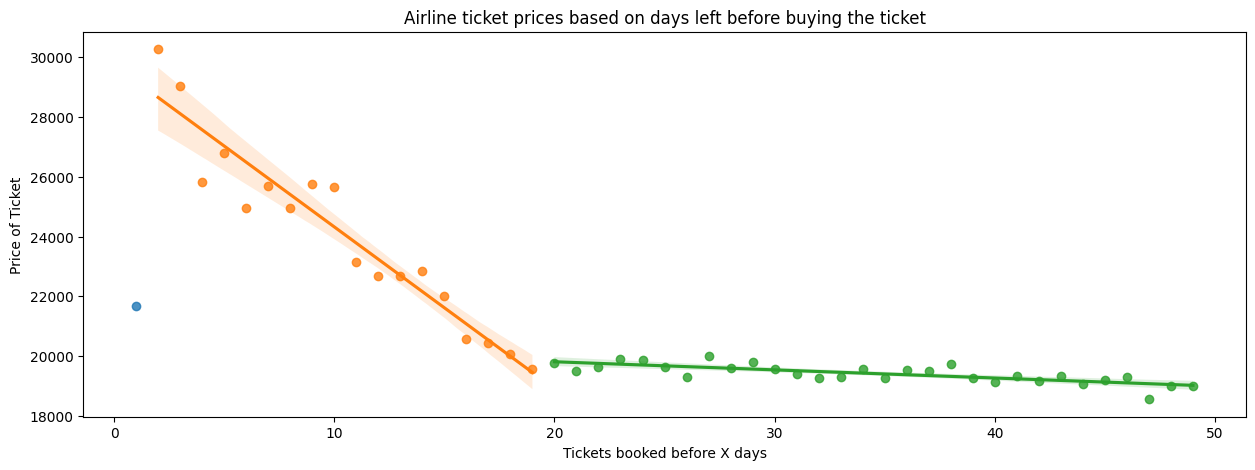

In [39]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
ax = plt.axes()
sns.regplot(x = df_temp.loc[df_temp['days_left'] == 1].days_left, y = df_temp.loc[df_temp['days_left'] == 1].price, data= df_temp, fit_reg= False, ax=ax)
sns.regplot(x = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].days_left, y = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].price, data = df_temp, fit_reg= True, ax=ax)
sns.regplot(x = df_temp.loc[df_temp['days_left'] >= 20].days_left, y = df_temp.loc[df_temp['days_left'] >= 20].price, data = df_temp, fit_reg= True, ax=ax)
ax.set(xlabel='Tickets booked before X days', ylabel='Price of Ticket', title='Airline ticket prices based on days left before buying the ticket')
plt.show(ax)

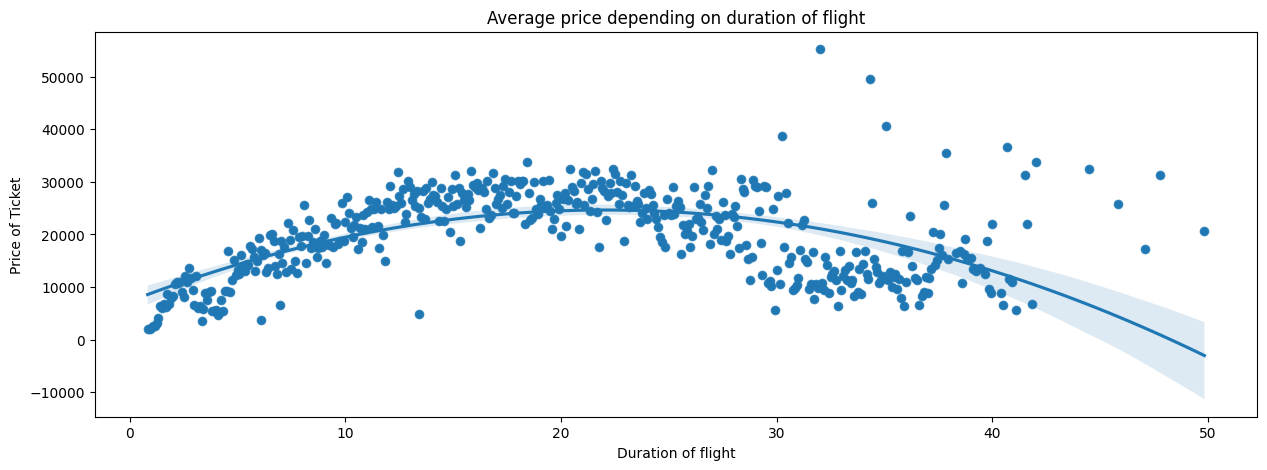

In [44]:
df_temp2 = df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
PD = sns.scatterplot(x='duration', y='price', data = df_temp2)
PD = sns.regplot(x='duration', y='price', data = df_temp2, order=2)
PD.set(xlabel='Duration of flight', ylabel='Price of Ticket', title='Average price depending on duration of flight')
plt.show(PD)

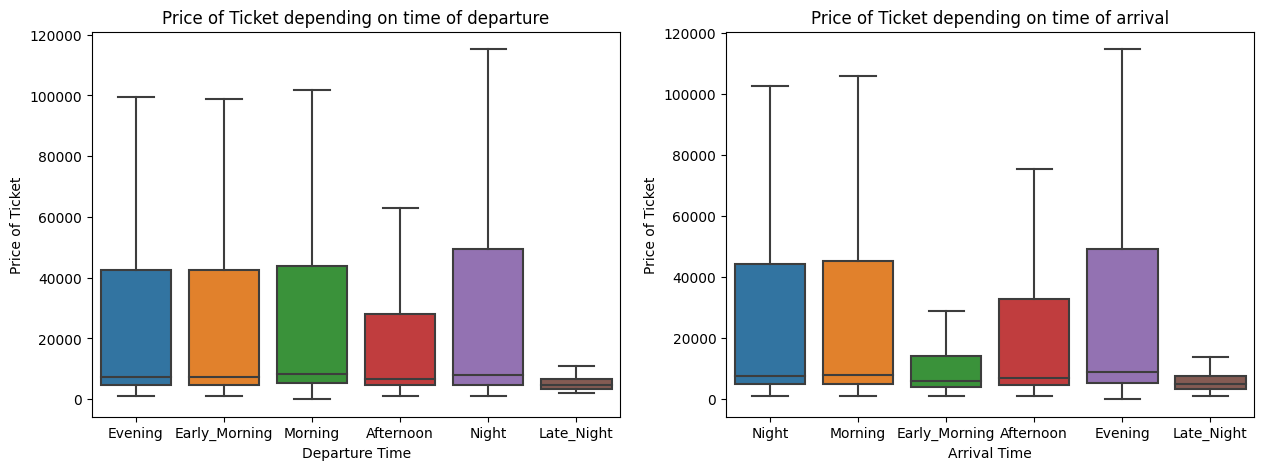

In [51]:
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
sns.boxplot(data = df, x = 'departure_time', y = 'price', showfliers = False).set(xlabel = 'Departure Time', ylabel = 'Price of Ticket', title ='Price of Ticket depending on time of departure')
plt.subplot (1,2,2)
sns.boxplot(data = df, x = 'arrival_time', y = 'price', showfliers =  False).set(xlabel = 'Arrival Time', ylabel = 'Price of Ticket', title = 'Price of Ticket depending on time of arrival')
plt.show()

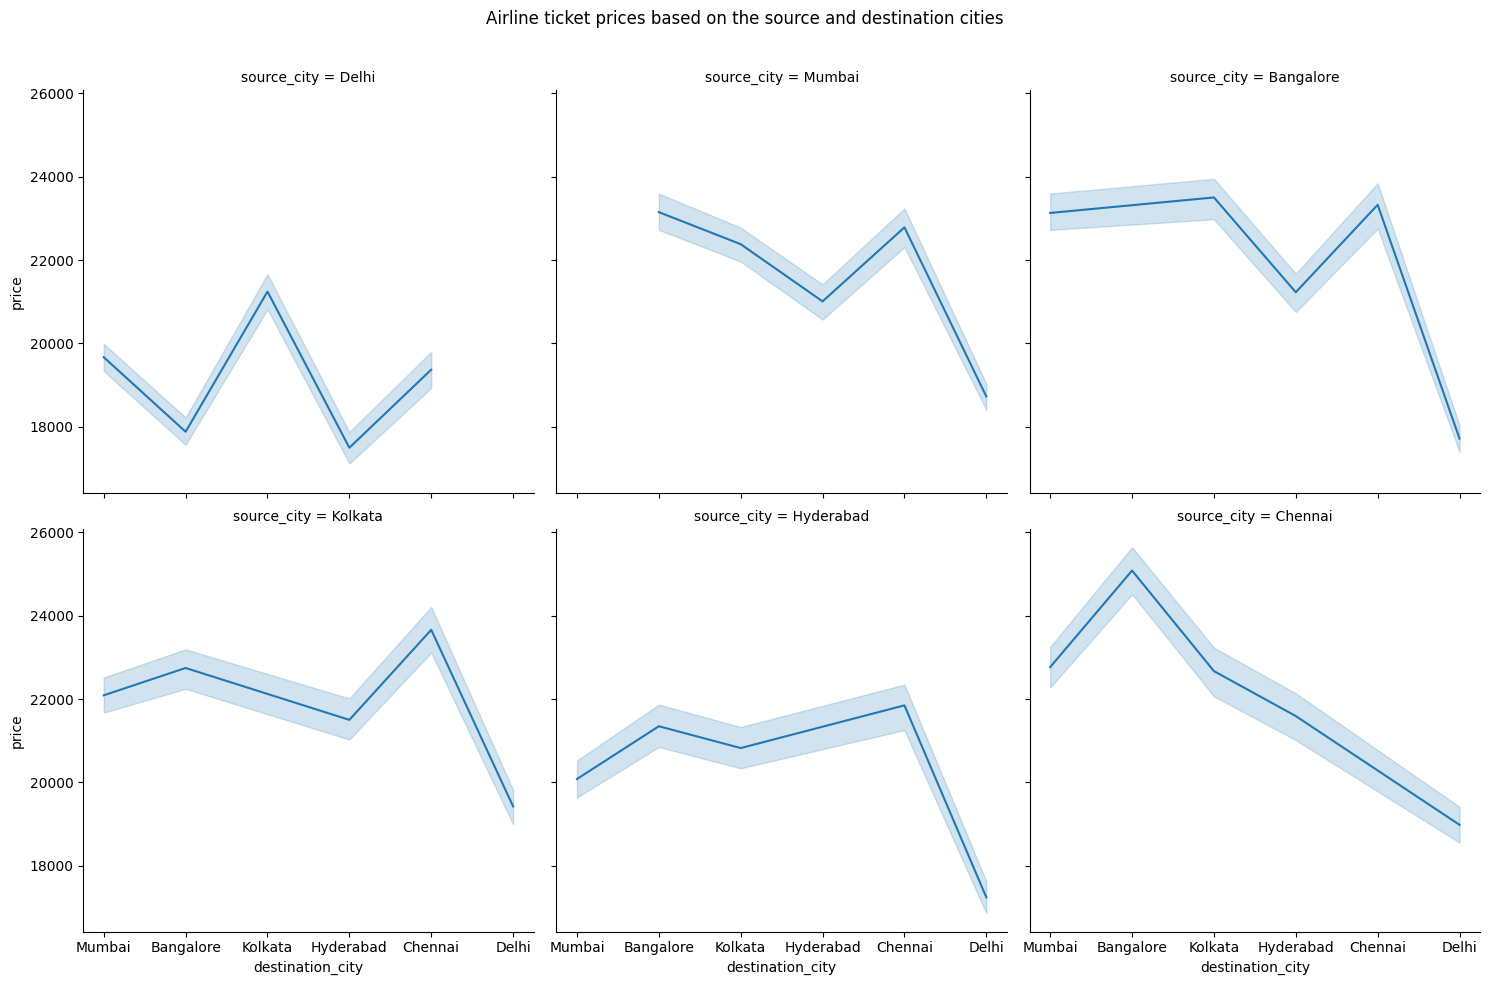

In [57]:
ax = sns.relplot(x = 'destination_city', y = 'price', col='source_city', col_wrap= 3, kind= 'line', data = df)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline ticket prices based on the source and destination cities')
plt.show(ax)


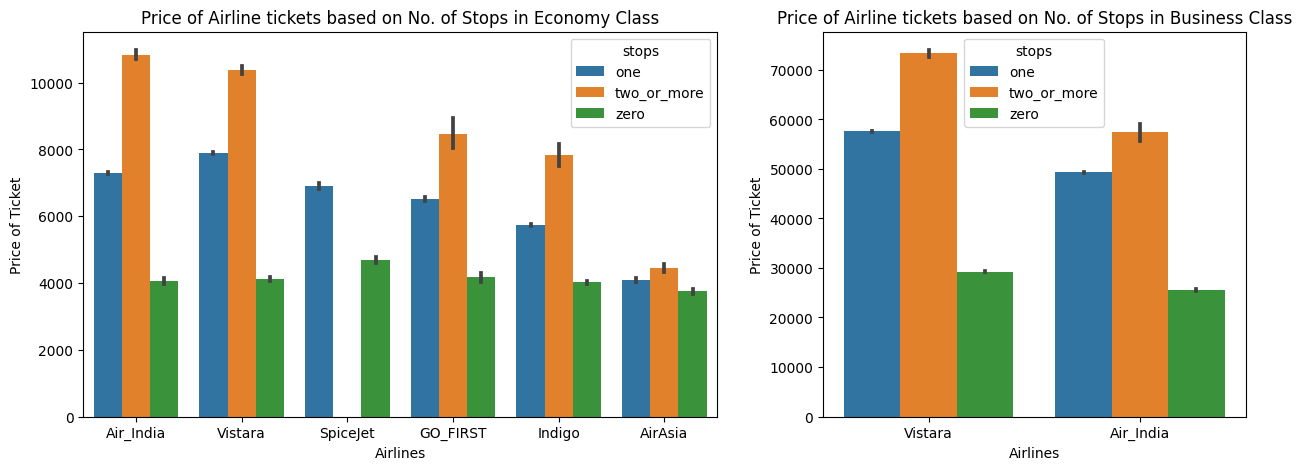

In [62]:
fig, axs = plt.subplots(1,2, gridspec_kw= {'width_ratios': [3,2]}, figsize = (15,5))
sns.barplot(y = 'price', x = 'airline', hue = 'stops', data = df.loc[df['class'] == 'Economy'].sort_values('price', ascending=False), ax = axs[0])
axs[0].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Economy Class')
sns.barplot(y='price', x='airline', hue='stops', data= df.loc[df['class'] == 'Business'].sort_values('price',ascending=False ), ax = axs[1])
axs[1].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Business Class')
plt.show(fig, axs)